# problem statement
Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading dataset

In [2]:
dftrain=pd.read_csv("train.csv")


In [3]:
dftest=pd.read_csv("test.csv")

In [4]:
dftrain.shape

(1168, 81)

In [5]:
dftest.shape

(292, 80)

the training dataset contains 1168 rows or entries and the test set contains 292 entries or data

In [7]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [8]:
dftrain.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

In [9]:
dftrain.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


there is a mix of int64 and object type data

In [10]:
dftrain.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

null values are present in training dataset

In [11]:
dftest.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

null values are present in testing dataset

In [13]:
dftrain.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [12]:
dftest.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

ID can be dropped because all values are unique

In [14]:
dftrain.drop(['Id'],axis=1,inplace=True)

In [15]:
dftest.drop(['Id'],axis=1,inplace=True)

In [19]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

# Simple imputation

In [16]:
from sklearn.impute import SimpleImputer


In [24]:
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [25]:
imp2=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [26]:
list1=["LotFrontage","MasVnrArea","GarageYrBlt"]

In [27]:
list2=["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [28]:
for i in list1:
    dftrain[i]=imp2.fit_transform(dftrain[i].values.reshape(-1,1))

In [29]:
for i in list2:
    dftrain[i]=imp.fit_transform(dftrain[i].values.reshape(-1,1))

In [31]:
dftrain["GarageFinish"]=imp.fit_transform(dftrain["GarageFinish"].values.reshape(-1,1))


In [32]:
dftrain.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [33]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

the poolQC field in test dataset contain all null values so we need to drop it from both datasets

In [34]:
dftrain.drop(["PoolQC"],axis=1,inplace=True)

In [35]:
dftest.drop(["PoolQC"],axis=1,inplace=True)

In [36]:
list3=["LotFrontage","MasVnrArea","GarageYrBlt"]

In [37]:
list4=["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","Electrical","FireplaceQu","GarageType","GarageFinish","GarageQual","Fence","MiscFeature"]

In [38]:
for i in list3:
    dftest[i]=imp2.fit_transform(dftest[i].values.reshape(-1,1))

In [40]:
for i in list4:
    dftest[i]=imp.fit_transform(dftest[i].values.reshape(-1,1))

In [41]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [42]:
dftest["GarageCond"]=imp.fit_transform(dftest["GarageCond"].values.reshape(-1,1))


# Label Encoder

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
for i in dftrain.columns:
    if(dftrain[i].dtypes=='O'):
        dftrain[i]=le.fit_transform(dftrain[i])

In [53]:
for i in dftest.columns:
    if(dftest[i].dtypes=='O'):
        dftest[i]=le.fit_transform(dftest[i])

# Descriptive statistics

In [55]:
dftrain.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,70.988470,10484.749144,0.996575,0.030822,1.938356,2.773973,0.0,3.004281,0.064212,12.145548,2.032534,2.005993,0.476027,3.043664,6.104452,5.595890,1970.930651,1984.758562,1.402397,1.086473,8.659247,9.363014,1.758562,102.310078,2.530822,3.725171,1.395548,2.282534,2.802226,2.273116,2.798801,444.726027,4.713185,46.647260,569.721747,1061.095034,1.035959,1.569349,0.933219,3.688356,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,2.328767,6.542808,5.742295,0.617295,2.389555,2.225171,1978.193841,1.233733,1.776541,476.860445,3.872432,3.905822,1.853596,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,1.880993,1.996575,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,41.940650,0.633120,22.437056,8957.442311,0.058445,0.172909,1.412262,0.710027,0.0,1.642667,0.284088,6.010364,0.871703,0.250035,1.180870,1.898625,1.390153,1.124343,30.145255,20.785185,0.832539,0.642848,3.097443,3.462380,0.611174,182.047152,0.699425,0.744463,0.709379,0.857830,0.674746,1.144218,1.837839,462.664785,0.925186,163.520016,449.375525,442.272249,0.302078,1.749129,0.249749,1.042606,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,0.832992,1.598484,0.987250,0.650575,0.905923,1.767017,24.198559,0.809747,0.745554,214.466769,0.592724,0.503323,0.501894,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,0.457685,0.092505,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,200

outliers are present in some columns

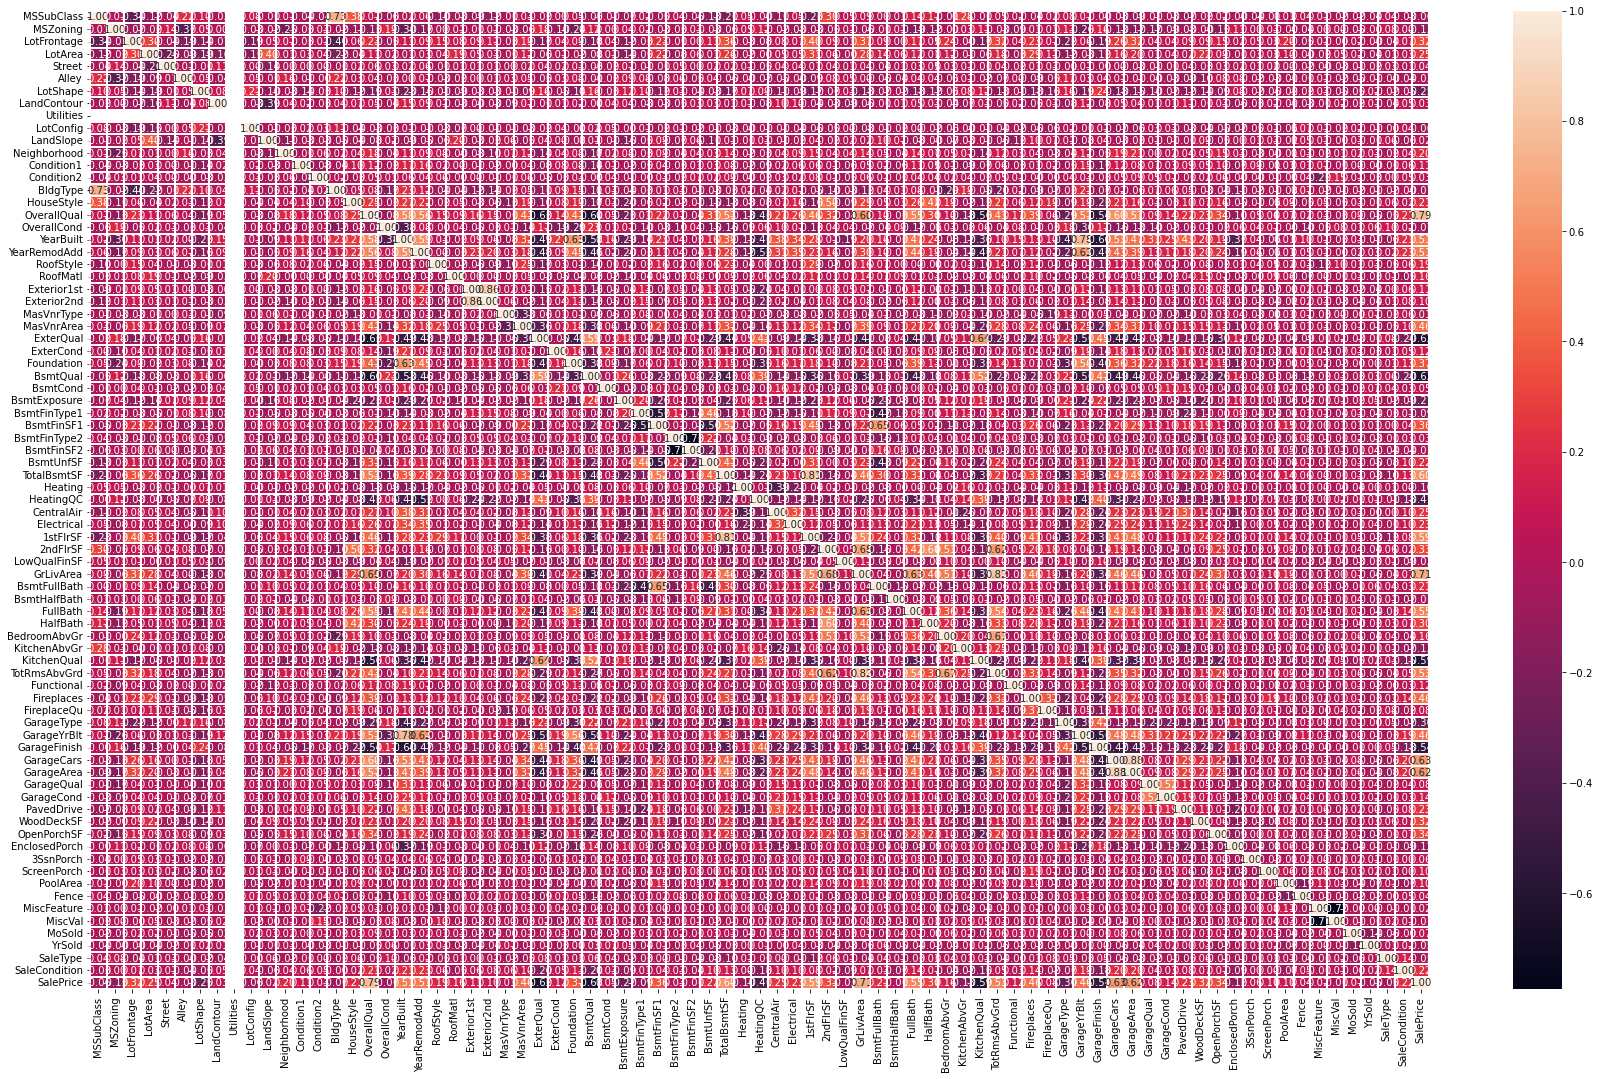

In [56]:
plt.figure(figsize=(30,18))
sns.heatmap(dftrain.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [57]:
dftrain.corr()["SalePrice"].sort_values()

BsmtQual        -0.626850
ExterQual       -0.624820
KitchenQual     -0.592468
GarageFinish    -0.537121
HeatingQC       -0.406604
GarageType      -0.299470
BsmtExposure    -0.268559
LotShape        -0.248171
MSZoning        -0.133221
KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
Heating         -0.100021
BsmtFinType1    -0.092109
BldgType        -0.066028
OverallCond     -0.065642
MSSubClass      -0.060775
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
LowQualFinSF    -0.032381
Alley           -0.029798
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
MasVnrType       0.007732
LandSlope        0.015485
MiscFeature      0.018725
BsmtFinType2     0.032285
LandContour      0.032836
Condition2       0.033956
Fence            0.040678
Street           0.044753
BsmtCond         0.048125
3SsnPorch        0.060119
MoSold           0.072764
GarageQual       0.080795
FireplaceQu      0.082705
Exterior2nd      0.097541
ScreenPorch 

MasVnrType field can be dropped since it has 0.7% correlation with target variable

In [59]:
dftrain.drop(["MasVnrType"],axis=1,inplace=True)

In [60]:
dftest.drop(["MasVnrType"],axis=1,inplace=True)

Utilities can be dropped since it has only 1 unique value

In [62]:
dftrain.drop(["Utilities"],axis=1,inplace=True)

In [63]:
dftest.drop(["Utilities"],axis=1,inplace=True)

# check for multicollinearity

In [64]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [67]:
x=dftrain.drop(["SalePrice"],axis=1)
calc_vif(x)

,Variables,VIF factor
0,MSSubClass,1.417485e+01
1,MSZoning,3.824145e+01
2,LotFrontage,1.976256e+01
3,LotArea,4.158542e+00
4,Street,3.487813e+02
5,Alley,1.533783e+00
6,LotShape,3.648857e+00
7,LandContour,2.163852e+01
8,LotConfig,5.069170e+00
9,LandSlope,1.680615e+00


# Bivariate analysis

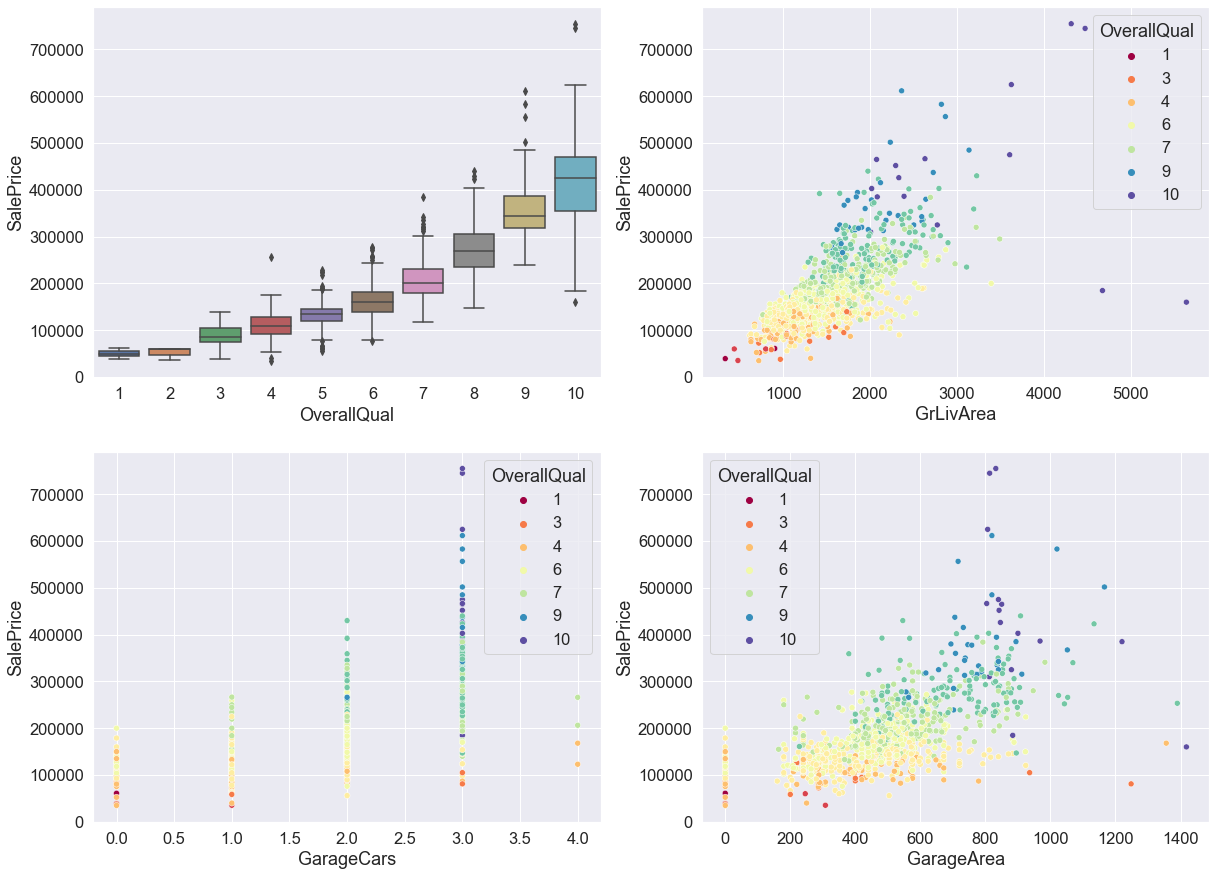

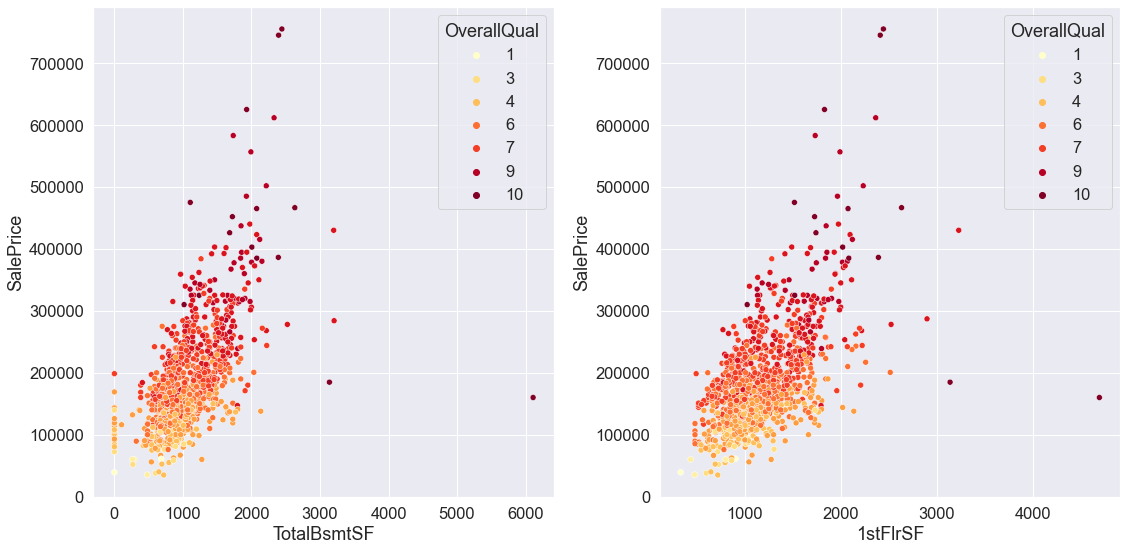

In [68]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=dftrain[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = dftrain.GrLivArea, y = dftrain.SalePrice, hue=dftrain.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = dftrain.GarageCars, y = dftrain.SalePrice, hue=dftrain.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = dftrain.GarageArea, y = dftrain.SalePrice, hue=dftrain.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = dftrain.SalePrice , x = dftrain.TotalBsmtSF, hue=dftrain.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = dftrain.SalePrice, x = dftrain['1stFlrSF'], hue=dftrain.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); plt.show()


## Total Rooms above Ground and Living Area

                                                                  Outliers: 3


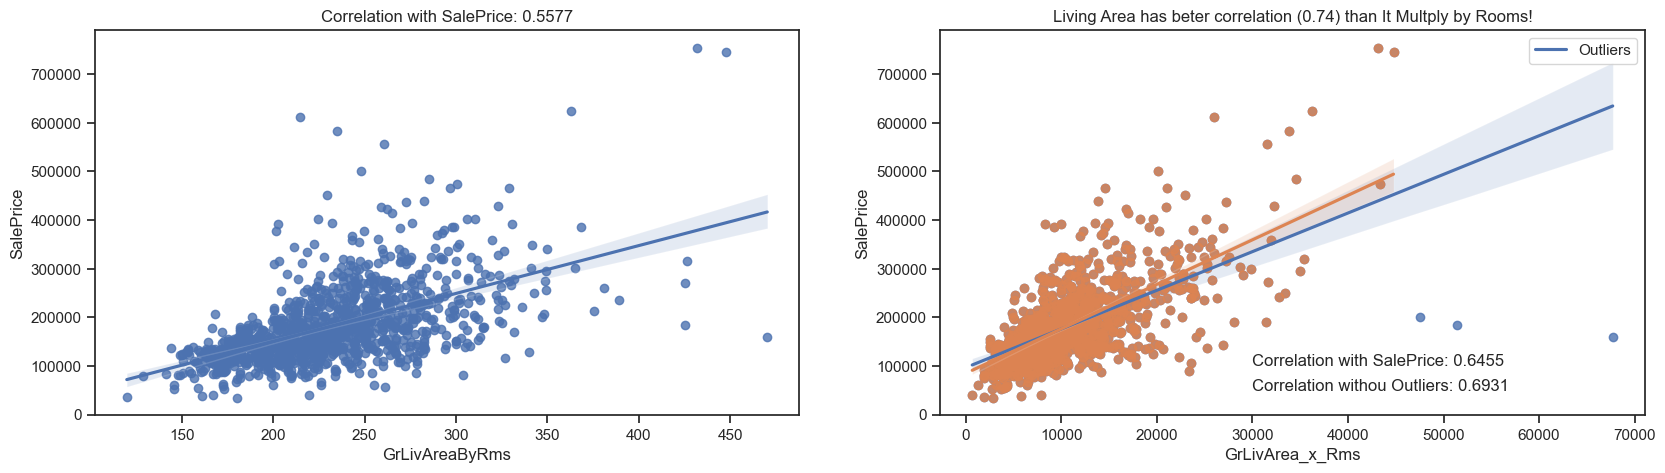

In [71]:
sns.reset_defaults()
sns.set(style="ticks", color_codes=True)

df = dftrain[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
df['GrLivAreaByRms'] = dftrain.GrLivArea/dftrain.TotRmsAbvGrd
df['GrLivArea_x_Rms'] = dftrain.GrLivArea*dftrain.TotRmsAbvGrd
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GrLivAreaByRms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GrLivAreaByRms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=30000, y=100000, s='Correlation with SalePrice: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))

print('                                                                  Outliers:',(df.GrLivArea_x_Rms>=45000).sum())
df = df.loc[df.GrLivArea_x_Rms<45000]
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); 
plt.title('Living Area has beter correlation ({:1.2f}) than It Multply by Rooms!'.format(df.GrLivArea.corr(df.SalePrice)))
plt.text(x=30000, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))
plt.show()
del df

As we can see, the interaction between the two features did not present a better correlation than that already seen in the living area, include it improves to 0.74 with the cut of the outliers.

On the other hand, the multiplication not only demonstrated the living area outliers already identified, but it still emphasized another. If the strategy is to drop the TotRmsAbvGrd, we should also exclude this additional outlier

## garage area and parking

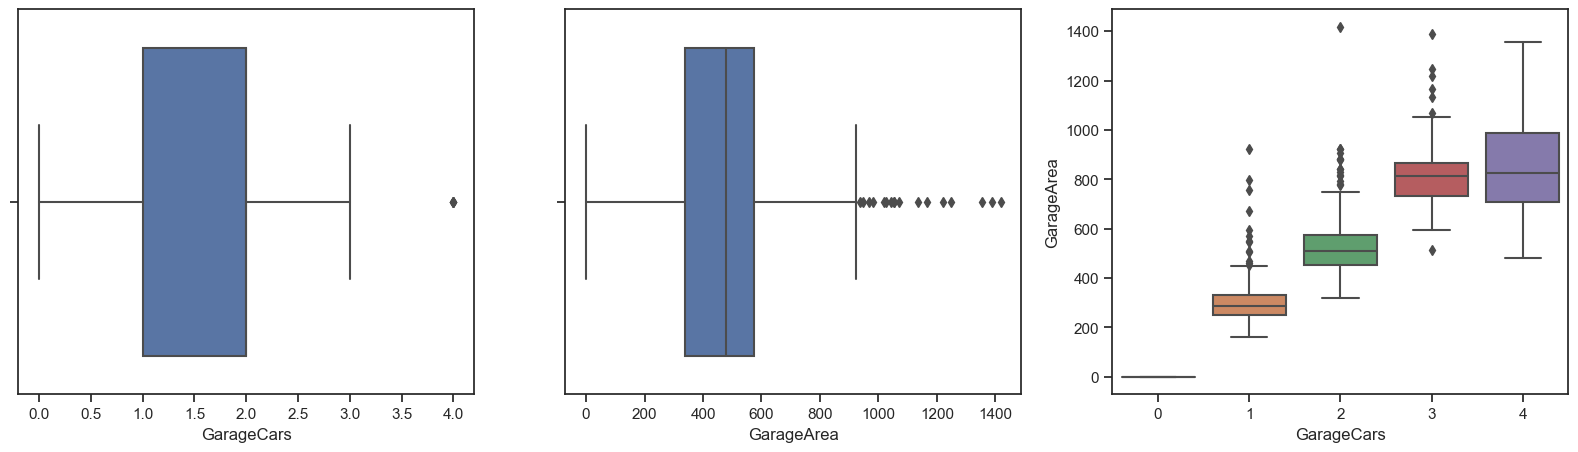

In [72]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(dftrain.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(dftrain.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(dftrain.GarageCars, dftrain.GarageArea)
plt.show()

Observation- From the boxplot above, we can note that more than 3 parking cars and more than 900 of area are outliers, since a few number of their observations. Although there is a relationship between them, most likely with a smaller number of parking spaces, there may be more garage area for other purposes, reason why the correlation between them is 0.88 and not 1.

## Total Basement Area Vs 1st Floor Area

                                                             Outliers: 3


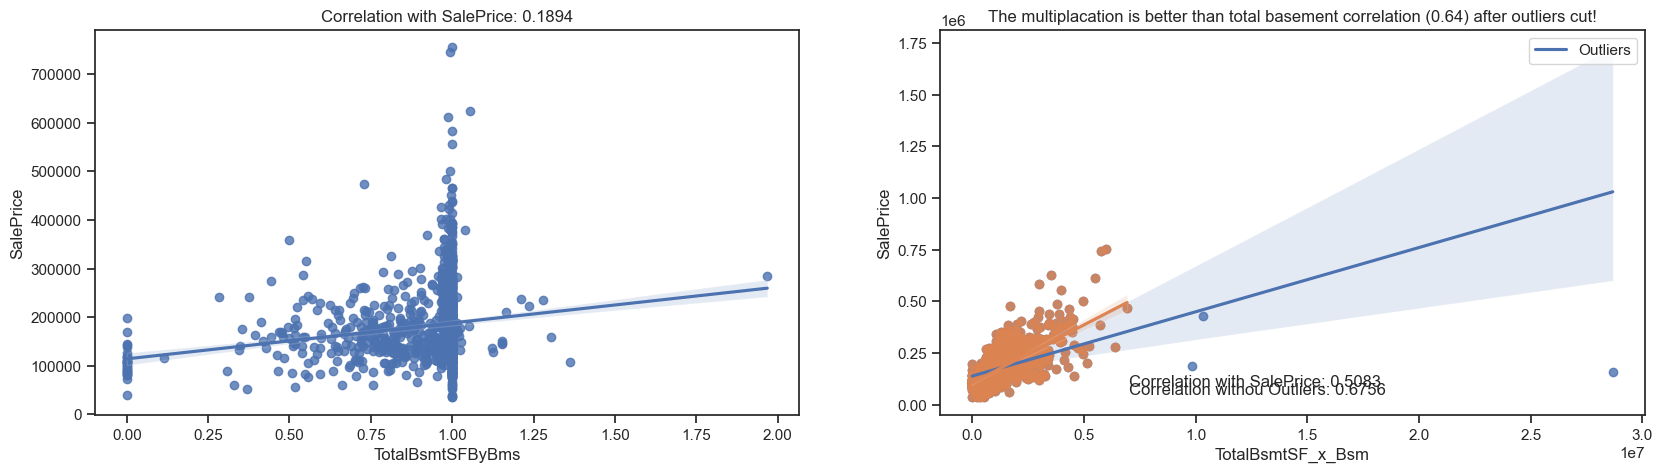

In [73]:
df = dftrain[['SalePrice', 'TotalBsmtSF', '1stFlrSF']]
df['TotalBsmtSFByBms'] = dftrain.TotalBsmtSF/dftrain['1stFlrSF']
df['TotalBsmtSF_x_Bsm'] = dftrain.TotalBsmtSF*dftrain['1stFlrSF']
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='TotalBsmtSFByBms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TotalBsmtSFByBms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=7e06, y=90000, s='Correlation with SalePrice: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))

print('                                                             Outliers:',(df.TotalBsmtSF_x_Bsm>=0.9e07).sum())
df = df.loc[df.TotalBsmtSF_x_Bsm<0.9e07]
sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); 
plt.title('The multiplacation is better than total basement correlation ({:1.2f}) after outliers cut!'.format(df.TotalBsmtSF.corr(df.SalePrice)))
plt.text(x=7e06, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))
plt.show()
del df

## Bathrooms Features

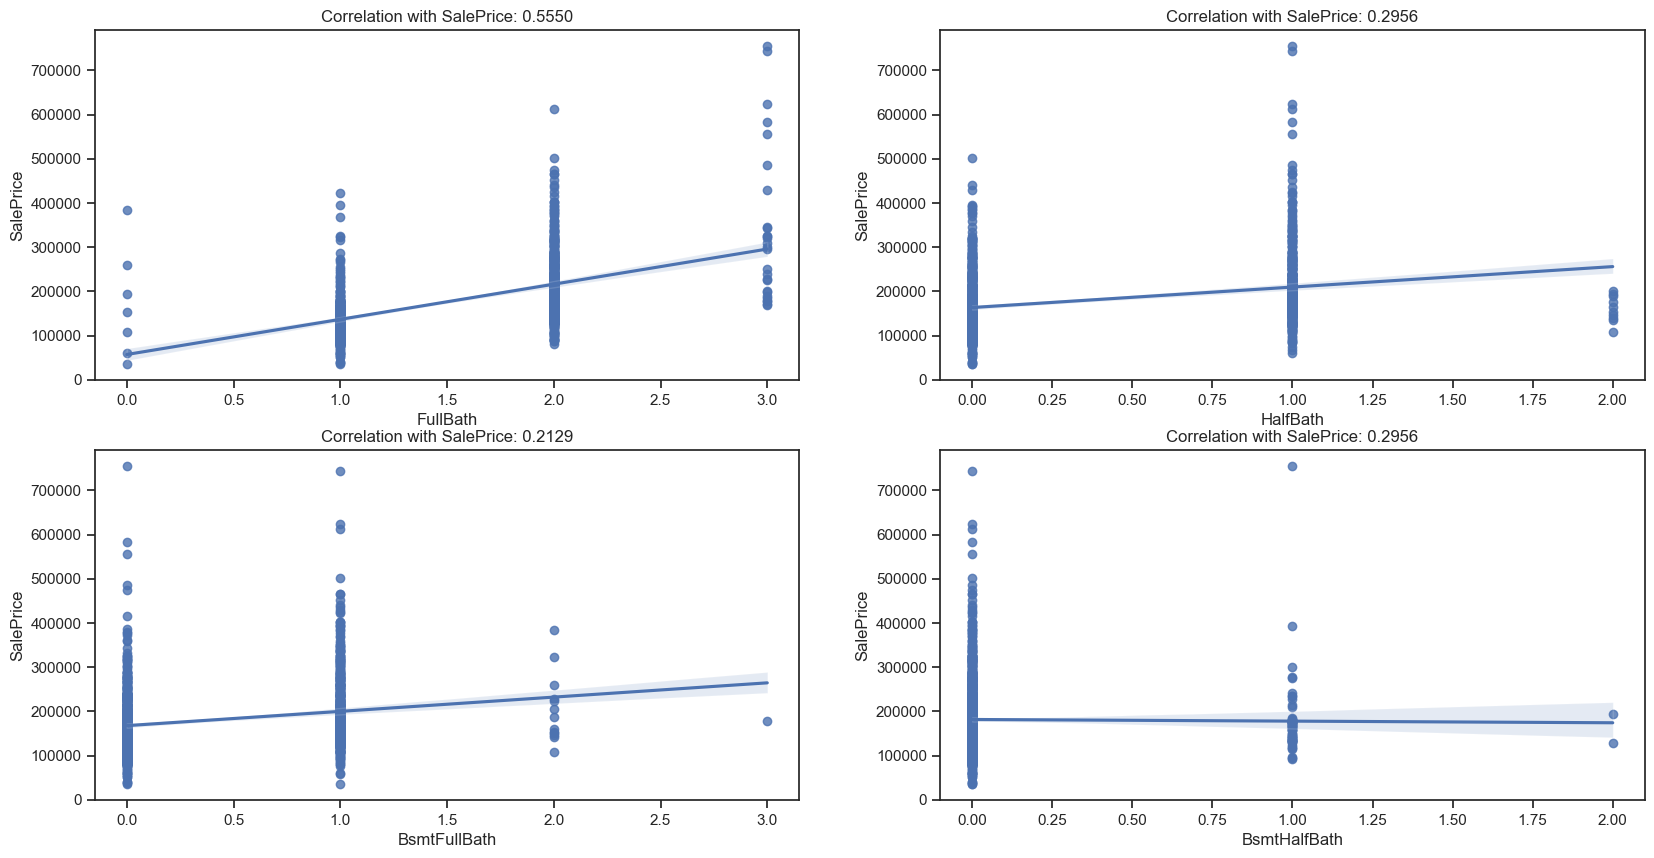

In [74]:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(221); sns.regplot(x='FullBath', y='SalePrice', data=dftrain)
plt.title('Correlation with SalePrice: {:6.4f}'.format(dftrain.FullBath.corr(dftrain['SalePrice'])))

fig2 = fig.add_subplot(222); sns.regplot(x='HalfBath', y='SalePrice', data=dftrain);
plt.title('Correlation with SalePrice: {:6.4f}'.format(dftrain.HalfBath.corr(dftrain['SalePrice'])))

fig3 = fig.add_subplot(223); sns.regplot(x='BsmtFullBath', y='SalePrice', data=dftrain)
plt.title('Correlation with SalePrice: {:6.4f}'.format(dftrain.BsmtFullBath.corr(dftrain['SalePrice'])))

fig4 = fig.add_subplot(224); sns.regplot(x='BsmtHalfBath', y='SalePrice', data=dftrain);
plt.title('Correlation with SalePrice: {:6.4f}'.format(dftrain.HalfBath.corr(dftrain['SalePrice'])))

plt.show()

FullBath has the largest correlation with SalePrice between than. The others individually, these features are not very important.

## boxplot

MSSubClass          AxesSubplot(0.125,0.847647;0.168478x0.0323529)
MSZoning         AxesSubplot(0.327174,0.847647;0.168478x0.0323529)
LotFrontage      AxesSubplot(0.529348,0.847647;0.168478x0.0323529)
LotArea          AxesSubplot(0.731522,0.847647;0.168478x0.0323529)
Street              AxesSubplot(0.125,0.808824;0.168478x0.0323529)
Alley            AxesSubplot(0.327174,0.808824;0.168478x0.0323529)
LotShape         AxesSubplot(0.529348,0.808824;0.168478x0.0323529)
LandContour      AxesSubplot(0.731522,0.808824;0.168478x0.0323529)
LotConfig               AxesSubplot(0.125,0.77;0.168478x0.0323529)
LandSlope            AxesSubplot(0.327174,0.77;0.168478x0.0323529)
Neighborhood         AxesSubplot(0.529348,0.77;0.168478x0.0323529)
Condition1           AxesSubplot(0.731522,0.77;0.168478x0.0323529)
Condition2          AxesSubplot(0.125,0.731176;0.168478x0.0323529)
BldgType         AxesSubplot(0.327174,0.731176;0.168478x0.0323529)
HouseStyle       AxesSubplot(0.529348,0.731176;0.168478x0.0323

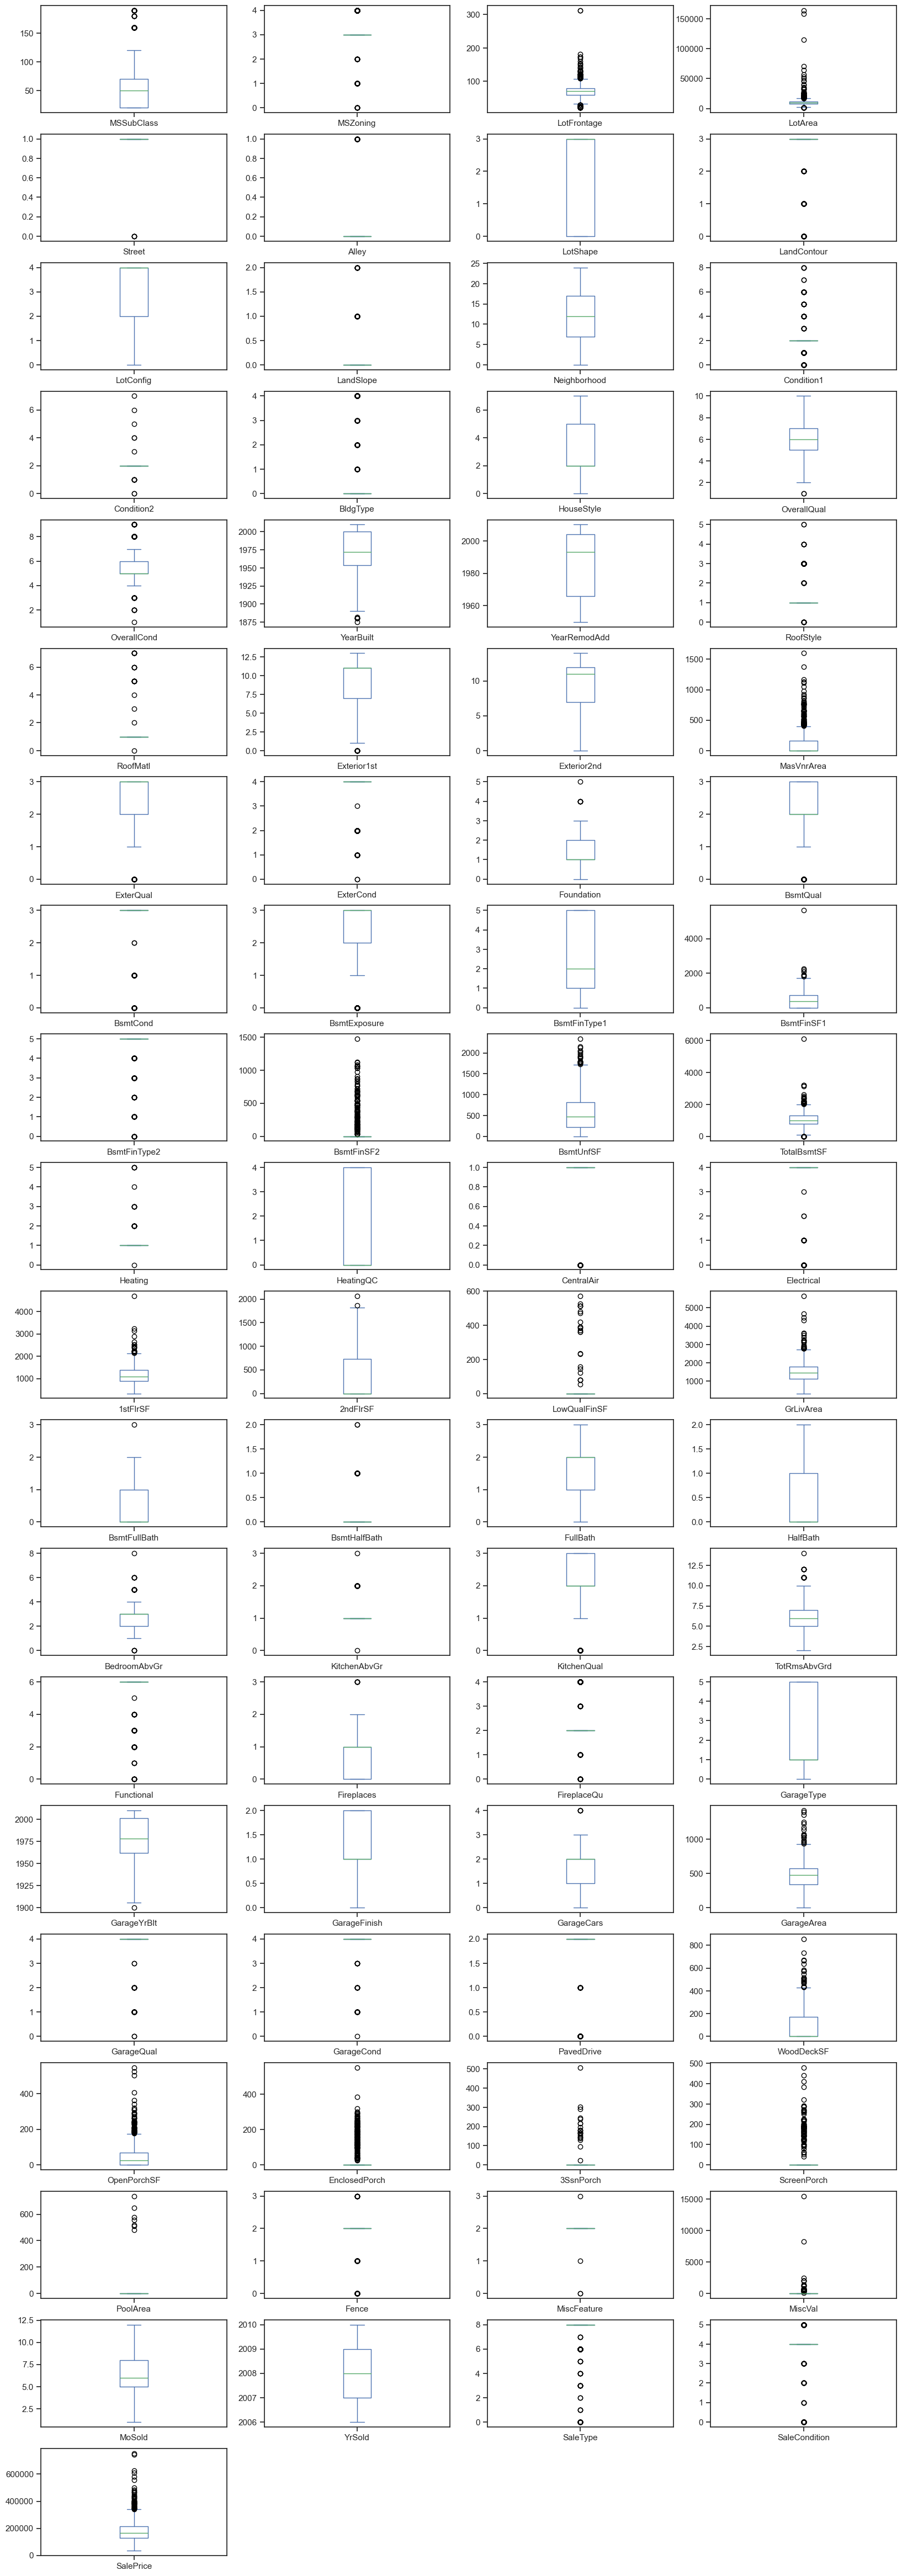

In [78]:
dftrain.plot(kind='box',subplots=True,layout=(20,4),figsize=(20,60))

outliers are present

# removal of outliers using Zscore

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(dftrain))

In [80]:
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([ 9, 20, 33, ..., 38, 61, 62], dtype=int64))

In [94]:
dfnew=dftrain[(z<7).all(axis=1)]

In [95]:
dfnew.shape

(1104, 77)

data loss= (1168-1104)/1168*100=5%

# skewness

In [96]:
dfnew.skew().sort_values()

Condition2       -8.940383
GarageCond       -5.631496
GarageQual       -4.863180
Functional       -3.975178
SaleType         -3.677654
BsmtFinType2     -3.655572
CentralAir       -3.652008
PavedDrive       -3.361592
LandContour      -3.303408
BsmtCond         -3.267372
Fence            -3.211757
Electrical       -3.188983
SaleCondition    -2.767681
ExterCond        -2.575394
ExterQual        -1.838998
MSZoning         -1.672719
KitchenQual      -1.416604
BsmtQual         -1.345684
BsmtExposure     -1.196462
LotConfig        -1.179732
GarageYrBlt      -0.664117
LotShape         -0.625574
Exterior1st      -0.622951
Exterior2nd      -0.605749
YearBuilt        -0.598112
YearRemodAdd     -0.509998
GarageFinish     -0.458486
GarageCars       -0.327562
BsmtFinType1     -0.069216
Foundation       -0.022526
Street            0.000000
PoolArea          0.000000
MiscFeature       0.000000
Neighborhood      0.055213
BedroomAbvGr      0.068338
FullBath          0.083266
YrSold            0.110268
G

In [91]:
list=dfnew.drop(["SalePrice"],axis=1)

In [92]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [93]:
dfnew.skew().sort_values()

Condition2       -8.940383
GarageCond       -5.631496
TotalBsmtSF      -5.365002
GarageQual       -4.863180
Functional       -3.975178
SaleType         -3.677654
BsmtFinType2     -3.655572
CentralAir       -3.652008
PavedDrive       -3.361592
LandContour      -3.303408
BsmtCond         -3.267372
Fence            -3.211757
Electrical       -3.188983
SaleCondition    -2.767681
ExterCond        -2.575394
BsmtUnfSF        -2.179910
ExterQual        -1.838998
MSZoning         -1.672719
KitchenQual      -1.416604
BsmtQual         -1.345684
BsmtExposure     -1.196462
LotConfig        -1.179732
LotFrontage      -1.135394
Condition1       -1.034124
LotArea          -0.889027
FireplaceQu      -0.751000
GarageYrBlt      -0.664117
LotShape         -0.625574
Exterior1st      -0.622951
Exterior2nd      -0.605749
BsmtFinSF1       -0.604656
YearBuilt        -0.598112
YearRemodAdd     -0.509998
GarageFinish     -0.458486
OverallCond      -0.378527
GarageCars       -0.327562
GrLivArea        -0.193805
B

# standard scaler

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [98]:
x=dfnew.drop(["SalePrice"],axis=1)
y=dfnew["SalePrice"]

In [99]:
dfx=sc.fit_transform(x)

In [100]:
dfx.mean()

-2.7917536068305926e-16

# application of machine learning models

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [111]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

## KNeighborsRegressor

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.8226000715365405


at random state 1, testing accuracy is 0.792214038451756


at random state 2, testing accuracy is 0.7537321625827171


at random state 3, testing accuracy is 0.780082324420093


at random state 4, testing accuracy is 0.8014499639154283


at random state 5, testing accuracy is 0.8370578185632004


at random state 6, testing accuracy is 0.7962845972711772


at random state 7, testing accuracy is 0.7509557689065849


at random state 8, testing accuracy is 0.7911509480062467


at random state 9, testing accuracy is 0.7922483056488833


at random state 10, testing accuracy is 0.7962524293427459


at random state 11, testing accuracy is 0.8222950258778704


at random state 12, testing accuracy is 0.7923295084644637


at random state 13, testing accuracy is 0.8124220541589955


at random state 14, testing accuracy is 0.8147621283098808


at random state 15, testing accuracy is 0.7836208478306106


at random state 16, testing accuracy

In [116]:
score=cross_val_score(knr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82642343 0.80153356 0.80244946 0.78826702 0.75430042]
0.7945947778714572
0.02360754653666653


# RandomForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.8883808615846112


at random state 1, testing accuracy is 0.880703319588679


at random state 2, testing accuracy is 0.8750435895425857


at random state 3, testing accuracy is 0.8719458987522675


at random state 4, testing accuracy is 0.8822564988016264


at random state 5, testing accuracy is 0.8894863775633383


at random state 6, testing accuracy is 0.8953409168386804


at random state 7, testing accuracy is 0.8692713272696078


at random state 8, testing accuracy is 0.8975784742449525


at random state 9, testing accuracy is 0.8603166655351946


at random state 10, testing accuracy is 0.8924622199900949


at random state 11, testing accuracy is 0.9059190954322988


at random state 12, testing accuracy is 0.8628089562596035


at random state 13, testing accuracy is 0.8867521305788476


at random state 14, testing accuracy is 0.8935796798984776


at random state 15, testing accuracy is 0.8840090369394489


at random state 16, testing accurac

In [115]:
score=cross_val_score(rfr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89455612 0.85444934 0.89299102 0.87170057 0.85984653]
0.8747087149499781
0.01654411244710789


In [113]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.9062023222586327


at random state 1, testing accuracy is 0.8903533193149558


at random state 2, testing accuracy is 0.8531206541212375


at random state 3, testing accuracy is 0.8910015387242559


at random state 4, testing accuracy is 0.8633109570843557


at random state 5, testing accuracy is 0.8816877389469374


at random state 6, testing accuracy is 0.8798396643011659


at random state 7, testing accuracy is 0.8674350217012721


at random state 8, testing accuracy is 0.8932647003435348


at random state 9, testing accuracy is 0.8750112602493455


at random state 10, testing accuracy is 0.876796050308615


at random state 11, testing accuracy is 0.9065478309220314


at random state 12, testing accuracy is 0.8630418581349859


at random state 13, testing accuracy is 0.8747366551874349


at random state 14, testing accuracy is 0.8938137835835133


at random state 15, testing accuracy is 0.8729092324203479


at random state 16, testing accurac

In [114]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.88669169 0.87169529 0.87417336 0.87114001]
0.875925089050063
0.006320135111440216


In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model_selection(gbr)

at random state 0, testing accuracy is 0.8998764207482189


at random state 1, testing accuracy is 0.9077856543720134


at random state 2, testing accuracy is 0.9034393355211664


at random state 3, testing accuracy is 0.8841890613957955


at random state 4, testing accuracy is 0.8938210406124432


at random state 5, testing accuracy is 0.8985072967105288


at random state 6, testing accuracy is 0.897441674400084


at random state 7, testing accuracy is 0.9007757746076135


at random state 8, testing accuracy is 0.9140014185932537


at random state 9, testing accuracy is 0.8767678590587206


at random state 10, testing accuracy is 0.9131410833645005


at random state 11, testing accuracy is 0.9075637934572915


at random state 12, testing accuracy is 0.8963308587293513


at random state 13, testing accuracy is 0.8897331675628678


at random state 14, testing accuracy is 0.9017977368517169


at random state 15, testing accuracy is 0.8872029101251475


at random state 16, testing accurac

In [122]:
score=cross_val_score(gbr,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.91575621 0.91039718 0.85901898 0.88852681 0.89081335 0.91671522
 0.86334499]
0.8920818229562401
0.022155095463363254


we will use gradient boost regressor for the model

# hyper parameter tuning

In [124]:
from sklearn.model_selection import GridSearchCV

In [126]:
dict={"n_estimators":[50,100,200],
      "learning_rate":[0.1,1.0], 
      "loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
      "criterion":['friedman_mse', 'squared_error', 'mse']}
      

In [127]:
gd=GridSearchCV(estimator=gbr,param_grid=dict,cv=7)

In [128]:
gd.fit(dfx,y)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 1.0],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 200]})

In [129]:
gd.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'huber',
 'n_estimators': 200}

In [130]:
gd.best_score_

0.903114211839487

# final model

In [132]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1,loss= 'huber',n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=64,test_size=0.30)
instance=gbr
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {64} testing accuracy is {r2_score(y_test,pred_test)}")


at random state 64 testing accuracy is 0.9259267332784283


# visualisation

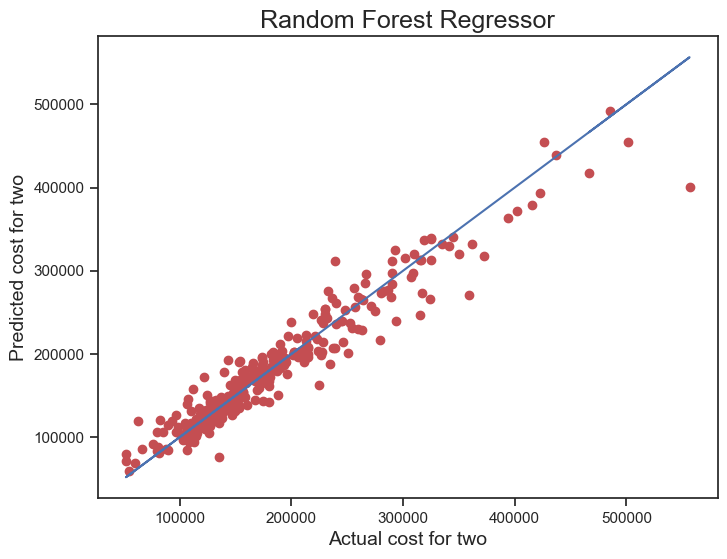

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual cost for two',fontsize= 14)
plt.ylabel('Predicted cost for two',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

# prediction

In [136]:
import numpy as np
predicted=np.array(gd.predict(dftest))
data_com = pd.DataFrame({"Predicted":predicted})
data_com.head(50)

,Predicted
0,467069.374326
1,428263.652241
2,388094.771849
3,389877.063179
4,374041.812521
5,463853.530825
6,484829.163901
7,462378.938369
8,490508.436458
9,475292.151428


# Model saving

In [137]:
import pickle
filename="housing_price.pkl"
pickle.dump(gbr,open(filename,'wb'))